# In this notebook we create a machine learning model to predict the rent prices of brazilian houses. The dataset was taken from [here](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent?resource=download). We used 10 features to train three different models, the [Lasso regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), the [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) and the [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html). It turns out that all three models have the same precision.




# **Importing the data**

In [67]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import scipy

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
#Importing the data
data = pd.read_csv('/content/houses_to_rent.csv')
data

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,R$420,"R$1,150",R$0,R$15,"R$1,585"
6076,6076,1,84,2,2,1,16,not acept,furnished,R$768,"R$2,900",R$63,R$37,"R$3,768"
6077,6077,0,48,1,1,0,13,acept,not furnished,R$250,R$950,R$42,R$13,"R$1,255"
6078,6078,1,160,3,2,2,-,not acept,not furnished,R$0,"R$3,500",R$250,R$53,"R$3,803"


In [70]:
data.drop(data.columns[0], axis=1, inplace=True)

In [71]:
print(data.iloc[0])
print(data.shape[1])

city                      1
area                    240
rooms                     3
bathroom                  3
parking spaces            4
floor                     -
animal                acept
furniture         furnished
hoa                     R$0
rent amount         R$8,000
property tax        R$1,000
fire insurance        R$121
total               R$9,121
Name: 0, dtype: object
13


**The data contains the following information:**
- city: the city where is the house
- rooms: number of rooms in the house
- bathroom: number of bathrooms in the house
- parking spaces: number of parking spaces around the building
- floor: the floor of the appartment
- animal: if animals are accpeted or not
- furniture: if it is furnished or not
- hoa: Homeowners association tax
- rent amount: the rent of the house
- property tax: a fixed tax to be paid periodically
- fire insurance: the fire insurance tax
- total: the total price

# **Cleaning the Data**

In [72]:
#Cleaning the data
data.floor.replace(to_replace='-', value=0, inplace=True)
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,0,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [73]:
data['animal']= data['animal'].apply(lambda x:1 if 'acept' == x else 0)
data['furniture']= data['furniture'].apply(lambda x:1 if 'furnished' == x else 0)
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,1,0,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,1,1,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,1,0,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,0,0,0,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [74]:
for column in ['hoa', 'rent amount', 'property tax', 'fire insurance', 'total']:
    data[column].replace(to_replace='R\$', value='', regex=True, inplace=True)
    data[column].replace(to_replace=',', value='', regex=True, inplace=True)
data.head()    

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,1,19,1,1,0,0,0,0,0,1200,41,16,1257


In [75]:
data['hoa'].replace(to_replace='Sem info', value=0, inplace=True)

In [76]:
data['hoa'].replace(to_replace='Incluso', value=0, inplace=True)

In [77]:
data['property tax'].replace(to_replace='Incluso', value=0, inplace=True)

In [78]:
#Converting all entries in the data to integer to make sure there are no string values
data = data.astype(dtype=np.int64)

In [79]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,1,19,1,1,0,0,0,0,0,1200,41,16,1257


# **Modelling**

In [80]:
data1 = data.copy()

In [81]:
Y = data1['city']
X = data1.loc[:,'area':]

Normalizing the data

In [82]:
data2 = X.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Log sale price')

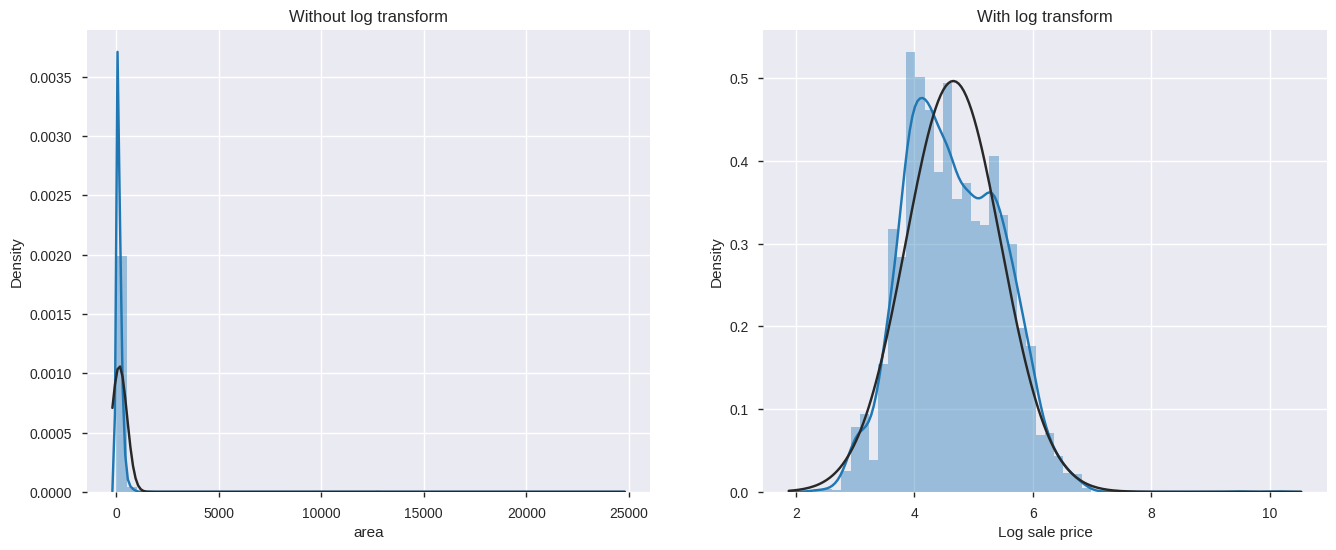

In [83]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Without log transform')
sns.distplot(data2['area'], kde=True, fit=scipy.stats.norm)

plt.subplot(1,2,2)
plt.title('With log transform')
sns.distplot(np.log(data2['area']), kde=True, fit=scipy.stats.norm)
plt.xlabel('Log sale price')

In [84]:
data2.drop('total', axis=1, inplace=True)

In [85]:
skew_data = pd.DataFrame(data2.select_dtypes(np.number).columns, columns=['Feature'])
skew_data['skew'] = skew_data['Feature'].apply(lambda feature: scipy.stats.skew(data2[feature]))
skew_data['abs_skew'] = skew_data['skew'].apply(abs)
skew_data['skewed'] = skew_data['abs_skew'].apply(lambda abs_skew: True if abs_skew>=0.5 else False)
skew_data

,Feature,skew,abs_skew,skewed
0,area,51.692713,51.692713,True
1,rooms,0.528140,0.528140,True
2,bathroom,1.069659,1.069659,True
3,parking spaces,1.434304,1.434304,True
4,floor,2.116862,2.116862,True
5,animal,-1.266058,1.266058,True
6,furniture,1.093137,1.093137,True
7,hoa,47.921760,47.921760,True
8,rent amount,1.640378,1.640378,True
9,property tax,54.672568,54.672568,True


In [86]:
for column in skew_data.query('skewed == True')['Feature'].values:
    data2[column] = np.log1p(data2[column])

In [87]:
data2

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,5.484797,1.386294,1.386294,1.609438,0.000000,0.693147,0.693147,0.000000,8.987322,6.908755,4.804021
1,4.174387,1.098612,0.693147,0.693147,2.397895,0.693147,0.000000,6.293419,6.710523,4.812184,2.484907
2,6.095825,1.791759,1.791759,1.609438,1.386294,0.693147,0.693147,8.336390,8.853808,7.257003,4.499810
3,4.304065,1.098612,1.098612,0.693147,2.564949,0.693147,0.000000,6.552508,7.131699,5.017280,2.833213
4,2.995732,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,7.090910,3.737670,2.833213
...,...,...,...,...,...,...,...,...,...,...,...
6075,3.931826,1.098612,0.693147,0.693147,1.098612,0.693147,0.000000,6.042633,7.048386,0.000000,2.772589
6076,4.442651,1.098612,1.098612,0.693147,2.833213,0.000000,0.693147,6.645091,7.972811,4.158883,3.637586
6077,3.891820,0.693147,0.693147,0.000000,2.639057,0.693147,0.000000,5.525453,6.857514,3.761200,2.639057
6078,5.081404,1.386294,1.098612,1.098612,0.000000,0.000000,0.000000,0.000000,8.160804,5.525453,3.988984


**Spliting data to test and train data**


In [94]:
data3 = data2.copy()

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data3)
data3= scaler.transform(data3)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data3, Y, train_size=0.8)

In [103]:
# Importing the models
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import f1_score
from sklearn.dummy import DummyRegressor

In [104]:
models = {
    'lasso':Lasso(normalize=True),
    'elastic':ElasticNet(alpha = 0.5,random_state = 0),
    'dummy': DummyRegressor()
}

In [105]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    print(name + ' trained.')

lasso trained.
elastic trained.
dummy trained.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [106]:
for model, _ in models.items():
    pred =  np.expm1(models[model].predict(X_test)).astype(int)
    print({model:f1_score(pred,Y_test, average='weighted')})

{'lasso': 0.9210292812777287}
{'elastic': 0.9210292812777287}
{'dummy': 0.9210292812777287}
